<a href="https://colab.research.google.com/github/maulidirifki/BasicAppX/blob/main/Pertemuan8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ah Maulidi Rifki Md
1941720197

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


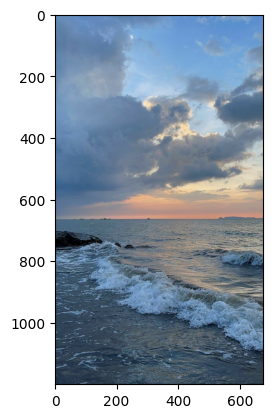

In [6]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/pantai.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) 
plt.imshow(img_rgb)

Membuat Gamma Correction.
Nilai Gamma akan diset dengan meminta masukkan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 5


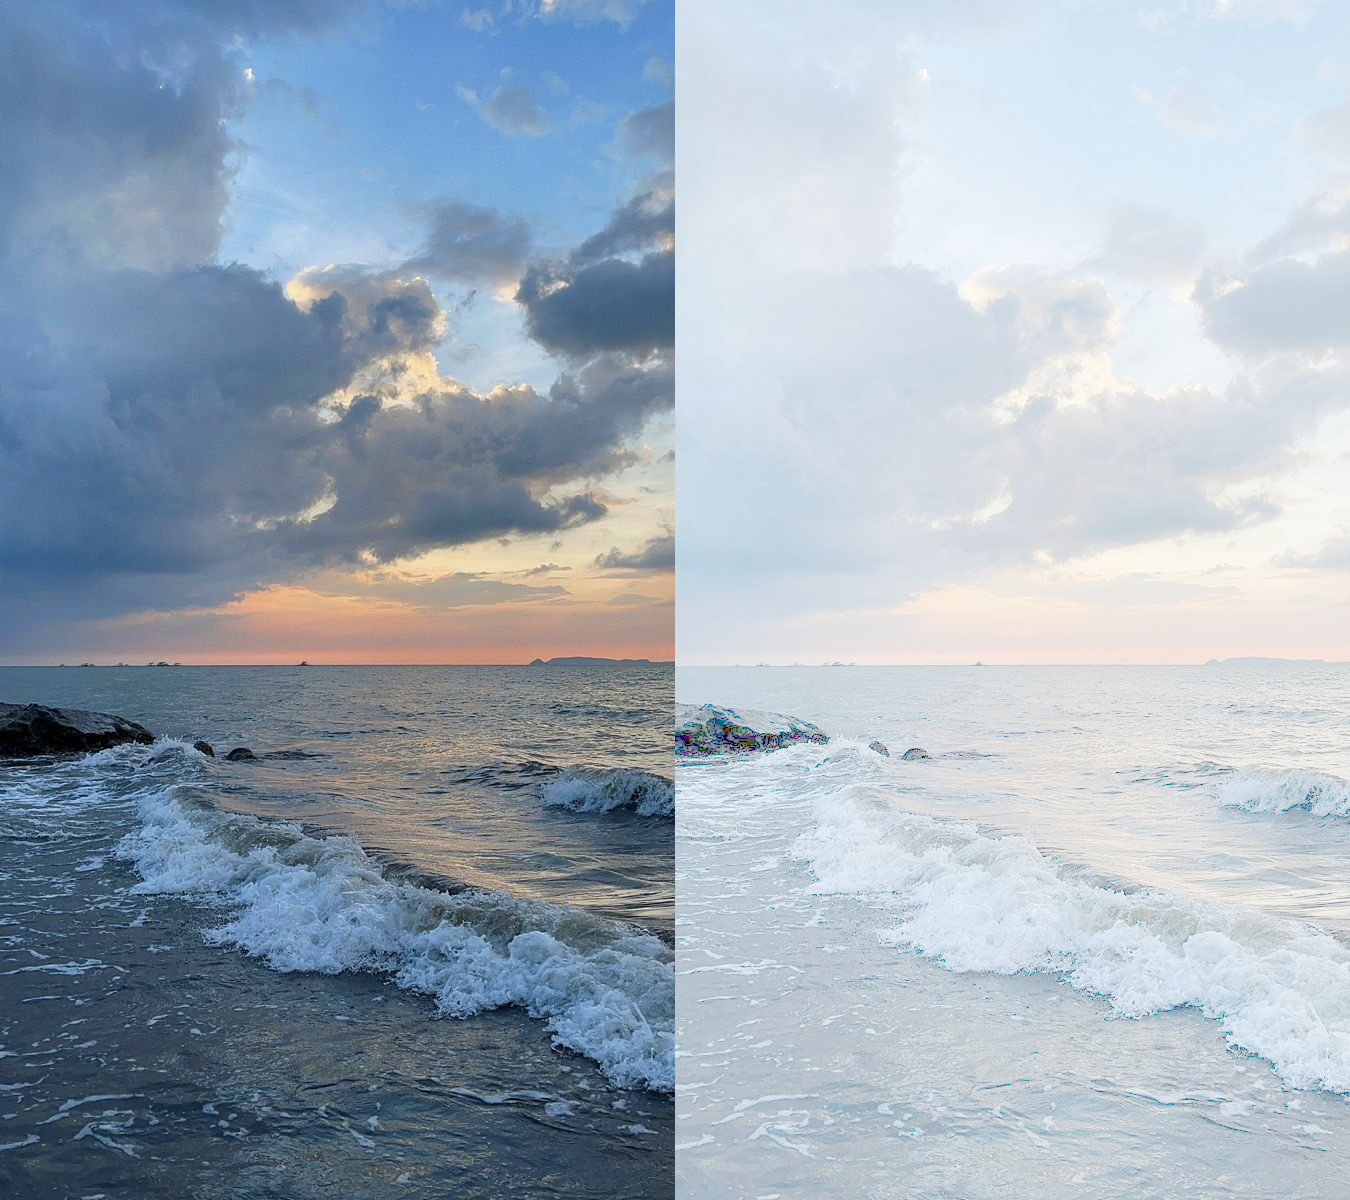

In [7]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Membuat Simulasi Image Depth

Ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada 
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 1


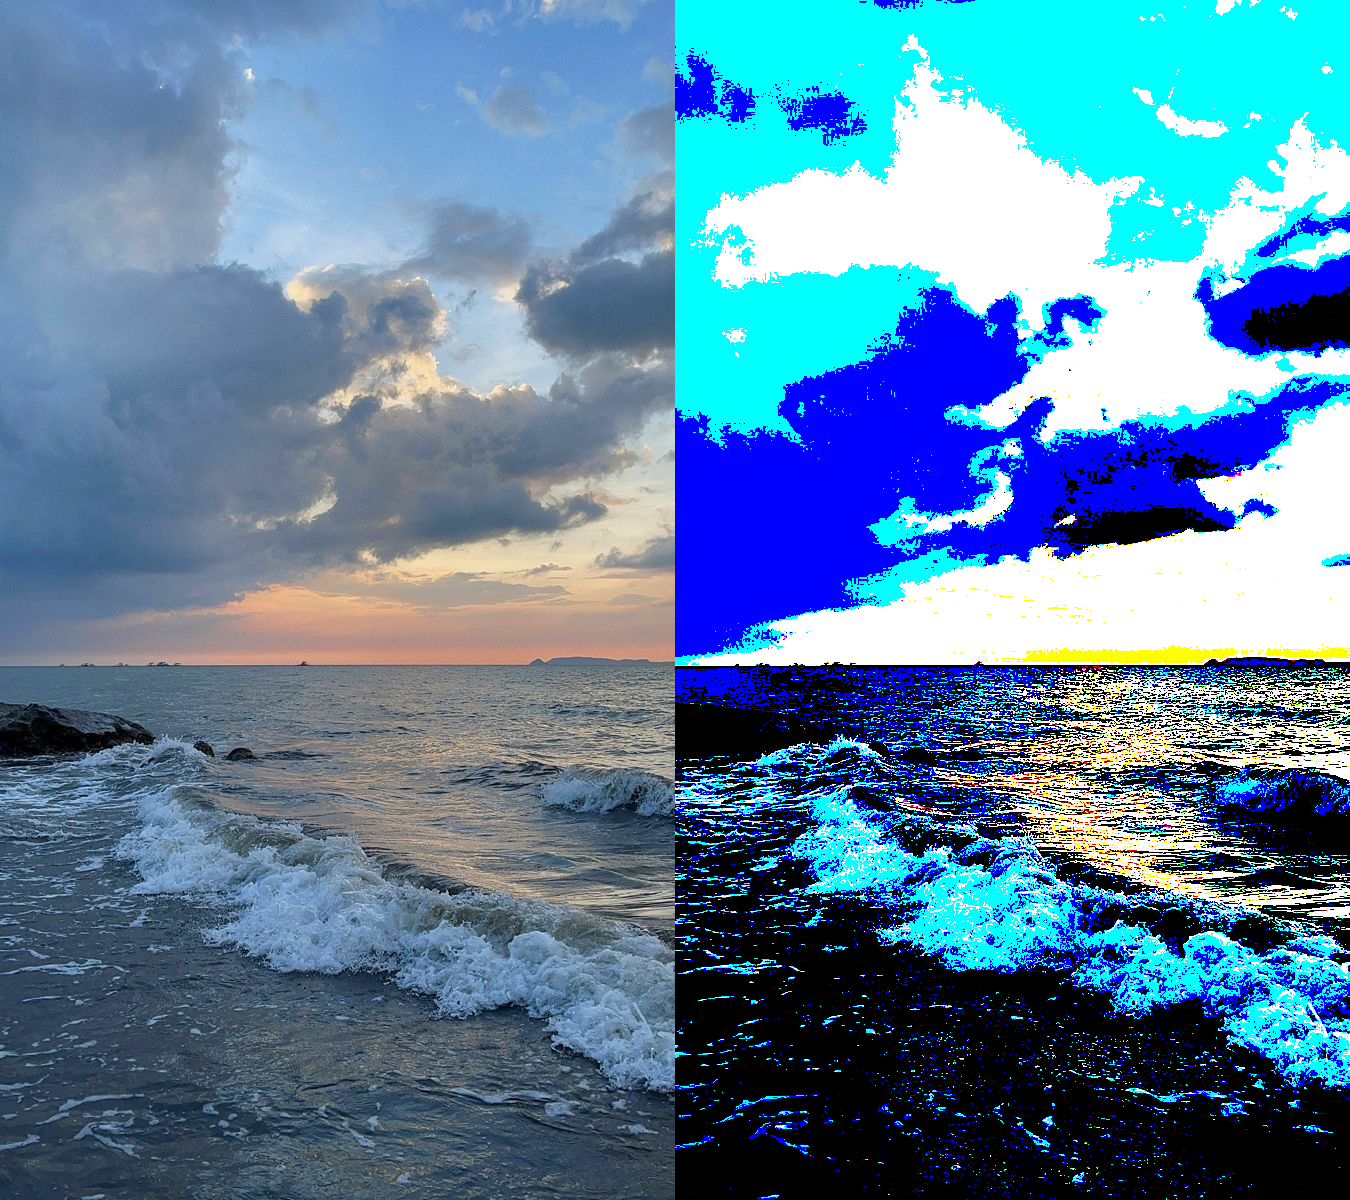

In [9]:
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)